In [189]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


path = r'F:\tstsaeed\ArcelorMittal_project\CoilData.csv'
df = pd.read_csv(path)
df.head()

,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,Thickness profile,...,p,s,al,ma,b,n,ti,cr,va,mo
0,396378,1,K371,10003,101,1302.1,1147,921,4.36,31,...,133,143,304,291,1,34,6,302,0,25
1,396376,3,K371,10123,101,1282.3,1150,920,4.37,35,...,118,90,395,384,1,33,12,189,25,7
2,396377,4,K321,10040,102,1297.4,1183,933,4.43,25,...,108,115,476,463,1,20,11,288,0,40
3,396379,3,K371,10243,102,1295.2,1165,910,4.44,28,...,139,98,306,296,1,21,9,253,0,9
4,396380,4,K321,10012,100,1293.3,1192,909,3.95,26,...,112,121,340,329,1,28,8,297,0,23


In [ ]:
df= df['coil'].tolist()
print(df)

In [198]:
#dfb4 = r"F:\tstsaeed\ArcelorMittal_project\SignalExport\400442B4.csv"
#dfb5 = r"F:\tstsaeed\ArcelorMittal_project\SignalExport\400442B5.csv"
dfb4 = r"F:\SignalExport\400442B4.csv"
dfb5 = r"F:\SignalExport\400442B5.csv"

def read_single_csv(filename):

    with open(filename) as f:
        data = f.read()

    #Split values in lengthpoints & values(width)
    data = data.split(":;")[1].split("Values")
    #print(data)
    length = data[0].split(";")
    width = data[1].split(";")
    

    #Remove empty values & turn data into floats instead of strings
    length = [x for x in length if x]
    length = [float(x) for x in length]
    width = [x for x in width if x]
    width = [float(x) for x in width]


    #Put the data into a dataframe
    df = pd.DataFrame()
    df['length'] = length
    df['width'] = width


    #Remove leading zeros & cut off first measurements 
    df = (df[df['width'] != 0])
    df = df[(df['length'] >= 45) ]
    return df


b4 = read_single_csv(dfb4)
b5 = read_single_csv(dfb5)

<AxesSubplot:xlabel='length', ylabel='width'>

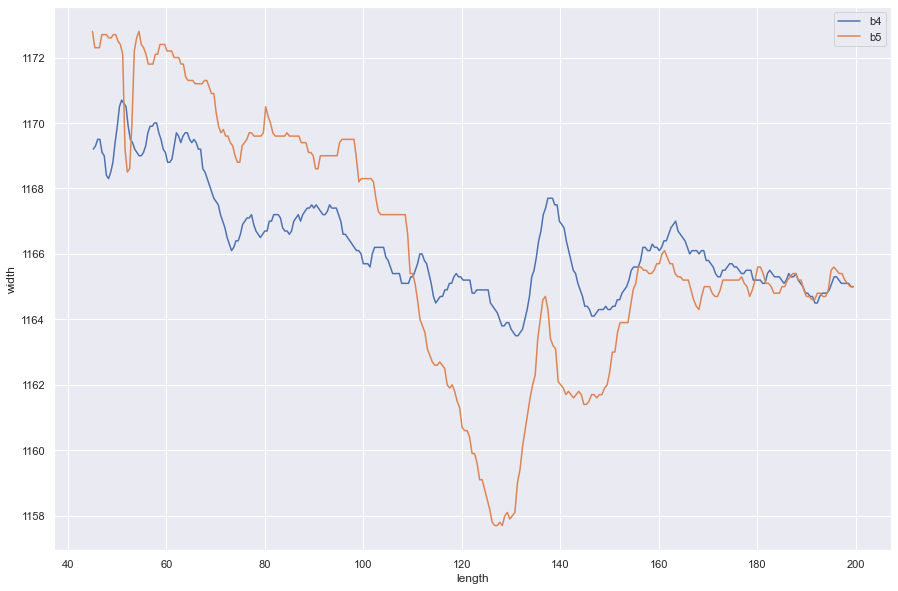

In [201]:

#Plot Data 
import matplotlib.pyplot as plt
import seaborn as sns

dfb4 = r"F:\SignalExport\401442B4.csv"
dfb5 = r"F:\SignalExport\401442B5.csv"
b4 = read_single_csv(dfb4)
b5 = read_single_csv(dfb5)

sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(data=b4,x='length',y='width',label='b4')
sns.lineplot(data=b5,x='length',y='width',label='b5')

In [6]:
b4c = b4[(b4['length'] >= 140) & (b4['length']<=170)]
b5c = b5[(b5['length'] >= 140) & (b5['length']<=170)]

In [ ]:
sns.set(rc={'figure.figsize':(15,9)})

sns.lineplot(data=b4c,x='length',y='width',label='b4')
sns.lineplot(data=b5c,x='length',y='width',label='b5')

In [ ]:
plt.figure()
_b4 = b4[(b4['length'] >= 140) & (b4['length'] <= 170)]
_b5 = b5[(b5['length'] >= 140) & (b5['length'] <= 170)]
plt.figure()
treshold = _b4.quantile(.1).width
sns.lineplot(data=_b4,x='length',y='width',label='B4')
g = sns.lineplot(data=_b5,x='length',y='width',label='B5')
g.axhline(treshold,c='r')
#_b4.describe()
#print(b4)
#print(b5)

In [186]:
###THIS IS THE FINAL FUNCTION%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
treshold_distance = 3.5

def calculate_constriction(treshold_distance,b5, b4):
    diff = []
    k=0
    for ii in range(140,170,3):
        
        b4_p2 = b4[(b4['length'] >= ii) & (b4['length']<=ii+3)]
        b5_p2 = b5[(b5['length'] >= ii) & (b5['length']<=ii+3)]
        tr = b4_p2['width'].mean()
        diff.append(b4_p2['width'].mean() - b5_p2['width'].mean())
    
    boolean_list = [True if x > treshold_distance else False for x in diff]
    num_true = (sum(boolean_list))
    total = len(boolean_list)
    if (num_true) > 0.5*(total):
            label = 1 # no constriction
    else:
        label = 0 # constriction occured
        
    return label , num_true/total
        
    



In [190]:
####Clean Data
import os 
df1= df['coil'].tolist()
cwd = os.getcwd()
print(cwd)
ind=0
for i in df1:
     
     try: 
          path_1 = r'F:/SignalExport/' + str(i) + 'B4.csv'
          path_2 = r'F:/SignalExport/' + str(i) + 'B5.csv'
          b4 = read_single_csv(path_1)
          b5 = read_single_csv(path_2)
     except:
          df = df.drop([ind])
         
     ind = ind+1

f:\tstsaeed\ArcelorMittal_project


In [ ]:
df_cleaned = df.to_csv('CoilData_cleaned.csv') 

In [ ]:
import os 
cwd = os.getcwd()
print(cwd)
all_labels = []
all_scores = []
for i in df:
     try: 
          path_1 = r'F:/SignalExport/' + str(i) + 'B4.csv'
          path_2 = r'F:/SignalExport/' + str(i) + 'B5.csv'
          print(path_1)
          print(path_2)
          b4 = read_single_csv(path_1)
          b5 = read_single_csv(path_2)
          b4 = b4[(b4['length'] >= 140) & (b4['length'] <= 170)]
          b5 = b5[(b5['length'] >= 140) & (b5['length'] <= 170)]
          label, score = calculate_constriction(treshold_distance,b5, b4) 
          all_labels.append(label)
          all_scores.append(score)
     except:
          continue

In [188]:
dict = {'label': all_labels, 'score': all_scores}  
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('signal_labels_TR3.5.csv') 